In [135]:
%matplotlib inline

In [136]:
import requests
import json
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np

In [137]:
base_url= "https://data.cityofnewyork.us/resource/uvbq-3m68.json"

In [138]:
results = Socrata("data.cityofnewyork.us", "Aig7X0m1zpKVCx0jkYnDa1yAB")

In [139]:
results = results.get("uvbq-3m68", limit=100)

In [140]:
results_df = pd.DataFrame.from_records(results)

In [141]:
#first filter the dataset so that the ones without violation status are dropped

results_df2= results_df.dropna(subset=['violation_status'])
results_df2

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,plate,precinct,reduction_amount,state,summons_image,summons_number,violation,violation_status,violation_time
1,0,NY,65,0,02/18/2019,TRAFFIC,NaN,COM,0,0,85776MH,013,65,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138670,EXPIRED MUNI MTR-COMM MTR ZN,HEARING HELD-NOT GUILTY,08:50A
11,0,NY,65,0,02/19/2019,TRAFFIC,NaN,COM,25,0,87306MK,013,40,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138967,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY REDUCTION,08:56A
13,0,K,45,0,12/17/2018,DEPARTMENT OF SANITATION,NaN,PAS,45,0,HNJ1105,073,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,1453010233,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY,10:05A
15,0,Q,115,0,11/27/2018,TRAFFIC,NaN,TRC,105,0,26152TC,115,10,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8695311971,NO STANDING-BUS STOP,HEARING HELD-GUILTY REDUCTION,08:54A
16,0,NY,65,0,02/19/2019,TRAFFIC,NaN,COM,40,0,68938MD,017,25,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138943,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,08:44A
18,125,NY,115,0,05/13/2019,TRAFFIC,NaN,PAS,0,10,PRZ9945,001,0,MN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8705441924,NO STANDING-DAY/TIME LIMITS,HEARING HELD-GUILTY REDUCTION,11:17A
20,0,NY,65,0,02/21/2019,TRAFFIC,NaN,PAS,40,0,XBVT95,013,25,NJ,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670139250,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,07:28A
22,0,NY,65,0,02/20/2019,TRAFFIC,NaN,COM,40,0,68938MD,017,25,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670139133,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,08:51A
27,0,NY,65,0,04/22/2019,TRAFFIC,NaN,PAS,0,0,2638137,018,65,IN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8696828938,FRONT OR BACK PLATE MISSING,HEARING HELD-NOT GUILTY,10:59A
37,0,NY,65,0,04/19/2019,TRAFFIC,NaN,COM,0,0,32769MM,018,65,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8696828800,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-NOT GUILTY,11:37A


## Examining the relationship between state license plate vs violation status

In [142]:
results_df2["violation_status"].unique()

array(['HEARING HELD-NOT GUILTY', 'HEARING HELD-GUILTY REDUCTION',
       'HEARING HELD-GUILTY', 'APPEAL AFFIRMED', 'HEARING PENDING'],
      dtype=object)

In [143]:
#drop hearing adjournments and hearing pending
results3=results_df2[results_df2.violation_status != ("HEARING ADJOURNMENT","HEARING PENDING")]
results3

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,plate,precinct,reduction_amount,state,summons_image,summons_number,violation,violation_status,violation_time
1,0,NY,65,0,02/18/2019,TRAFFIC,NaN,COM,0,0,85776MH,013,65,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138670,EXPIRED MUNI MTR-COMM MTR ZN,HEARING HELD-NOT GUILTY,08:50A
11,0,NY,65,0,02/19/2019,TRAFFIC,NaN,COM,25,0,87306MK,013,40,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138967,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY REDUCTION,08:56A
13,0,K,45,0,12/17/2018,DEPARTMENT OF SANITATION,NaN,PAS,45,0,HNJ1105,073,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,1453010233,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY,10:05A
15,0,Q,115,0,11/27/2018,TRAFFIC,NaN,TRC,105,0,26152TC,115,10,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8695311971,NO STANDING-BUS STOP,HEARING HELD-GUILTY REDUCTION,08:54A
16,0,NY,65,0,02/19/2019,TRAFFIC,NaN,COM,40,0,68938MD,017,25,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670138943,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,08:44A
18,125,NY,115,0,05/13/2019,TRAFFIC,NaN,PAS,0,10,PRZ9945,001,0,MN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8705441924,NO STANDING-DAY/TIME LIMITS,HEARING HELD-GUILTY REDUCTION,11:17A
20,0,NY,65,0,02/21/2019,TRAFFIC,NaN,PAS,40,0,XBVT95,013,25,NJ,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670139250,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,07:28A
22,0,NY,65,0,02/20/2019,TRAFFIC,NaN,COM,40,0,68938MD,017,25,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8670139133,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-GUILTY REDUCTION,08:51A
27,0,NY,65,0,04/22/2019,TRAFFIC,NaN,PAS,0,0,2638137,018,65,IN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8696828938,FRONT OR BACK PLATE MISSING,HEARING HELD-NOT GUILTY,10:59A
37,0,NY,65,0,04/19/2019,TRAFFIC,NaN,COM,0,0,32769MM,018,65,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8696828800,FAIL TO DISP. MUNI METER RECPT,HEARING HELD-NOT GUILTY,11:37A


In [144]:
#NY Drivers
ny_drivers=results_df2[results_df2["state"]=="NY"]
#Out of State Drivers
out_of_state_drivers=results_df2[results_df2["state"]!="NY"]

In [145]:
#guilty NY
guilty=results_df2[(results_df2["violation_status"]=="HEARING HELD-GUILTY") & (results_df2["state"]=="NY")]
#not guilty NY
not_guilty=results_df2[(results_df2["violation_status"]=="HEARING HELD-NOT GUILTY") & (results_df2["state"]=="NY")] 
#total number of guilty and not guilty
guilty_count= len(guilty.index)
not_guilty_count= len(not_guilty.index)

In [146]:
not_guilty_count

5

Text(0.5, 1.0, 'New York Licensed Drivers Charged')

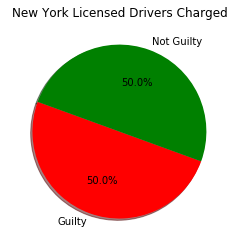

In [147]:
#for NY
labels=["Guilty","Not Guilty"]
ny_sizes=[guilty_count,not_guilty_count]
colors=["red","green"]
plt.pie(ny_sizes, shadow=True, startangle=160, labels=labels, colors=colors, autopct='%.1f%%')
plt.title("New York Licensed Drivers Charged")

In [148]:
#guilty out of state
oos_guilty=results_df2[(results_df2["violation_status"]=="HEARING HELD-GUILTY") & (results_df2["state"]!="NY")]
#not guilty out of state
oos_not_guilty=results_df2[(results_df2["violation_status"]=="HEARING HELD-NOT GUILTY") & (results_df2["state"]!="NY")] 
#total number of guilty and not guilty
oos_guilty_count= len(oos_guilty.index)
oos_not_guilty_count= len(oos_not_guilty.index)

In [149]:
oos_guilty_count

2

Text(0.5, 1.0, 'Out of State Licensed Drivers Charged')

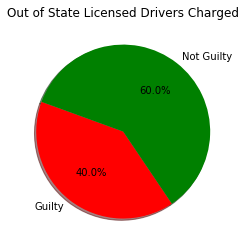

In [150]:
#for out of state
oos_labels=["Guilty","Not Guilty"]
oos_sizes=[oos_guilty_count,oos_not_guilty_count]
colors=["red","green"]
plt.pie(oos_sizes, shadow=True, startangle=160, labels=oos_labels, colors=colors, autopct='%.1f%%')
plt.title("Out of State Licensed Drivers Charged")